In [1]:
#
# hw5pr3titanic:  titanic-passenger clasification via kNN, DT, and RF
#

In [2]:
#
# In each of these, we start with a little less than before...
#
# Here, use iris and digits as examples, adapting as you go...
#
# Plus, always feel free to ask about the next steps! :-)
#

In [3]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

In [4]:
# let's read in our digits data...
# 
# for read_csv, use header=0 when row 0 is a header row
# 
filename = 'titanic.csv'
df = pd.read_csv(filename, header=0)   # read the file w/header row #0
print(f"{filename} : file read into a pandas dataframe.")

titanic.csv : file read into a pandas dataframe.


In [5]:
#
# Let's see it!
#
pd.set_option('display.max_rows', 150)  # None for no limit; default: 10
pd.set_option('display.min_rows', 150)  # None for no limit; default: 10
# let's view it!
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,the original Kaggle dataset! Adapted from here: https://www.kaggle.com/c/titanic
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",NaN
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",NaN
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",NaN
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",NaN
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY",NaN
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",NaN
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",NaN
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",NaN
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",NaN


In [6]:
#
# develop your model-building based on the previous examples!
#

#
# First, let's show some examples of dropping columns (features) that need to go...
#

In [7]:
#
# this df.info() call will show the different features (columns), their types, and how many non-null there are ...
#

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 15 columns):
 #   Column                                                                                Non-Null Count  Dtype  
---  ------                                                                                --------------  -----  
 0   pclass                                                                                1267 non-null   int64  
 1   survived                                                                              1267 non-null   int64  
 2   name                                                                                  1267 non-null   object 
 3   sex                                                                                   1267 non-null   object 
 4   age                                                                                   1004 non-null   float64
 5   sibsp                                                                              

In [8]:
#
# ok!  let's drop columns that are
#      + "cheating"  (they give away the answer and wouldn't be available)
#      + too sparse  (too many NAs)
#

COLUMNS = df.columns       # get column names
last_column = COLUMNS[-1]  # don't want the "url" column...
df_2 = df.drop(columns=[last_column])  # drop by name is ok

# the "boat" column is present when the lifeboat number is known: too much info!
df_2 = df_2.drop('boat', axis=1)     # or, axis = 1 indicates we want to drop a column, not a row

# the "cabin" column has too many missing values...
df_2 = df_2.drop('cabin', axis=1)

# let's see what's there...
df_2.info()  # re-look at the data ...    
# + some will still have too many NA's!
# + some will still be "cheating"
# + some simply won't be worth having

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1267 non-null   int64  
 1   survived   1267 non-null   int64  
 2   name       1267 non-null   object 
 3   sex        1267 non-null   object 
 4   age        1004 non-null   float64
 5   sibsp      1267 non-null   int64  
 6   parch      1267 non-null   int64  
 7   ticket     1267 non-null   object 
 8   fare       1266 non-null   float64
 9   embarked   1265 non-null   object 
 10  body       116 non-null    float64
 11  home.dest  706 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 118.9+ KB


In [9]:
#
# let's see everything - again
#

pd.set_option('display.max_rows', 150)  # None for no limit; default: 10
#pd.set_option('display.min_rows', 10)  # None for no limit; default: 10
# let's view it!
df_2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,S,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,S,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,S,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,S,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,C,22.0,"Montevideo, Uruguay"


In [10]:
#
# everything needs to be numeric! we'll convert female/male to 1/0
#

def numberize(s):
    """ converts 'male'/'female' to 0/1 """
    if s == 'female': return 1
    else:  return 0                   # or return int(s=='female')

df_2['sex'] = df_2['sex'].apply(numberize)

# can't run this cell twice!   (we've replaced things!)

In [11]:
#
# let's see everything - again
#

pd.set_option('display.max_rows', 10)  # None for no limit; default: 10
#pd.set_option('display.min_rows', 10)  # None for no limit; default: 10
# let's view it!
df_2

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,S,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,S,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,S,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...
1262,3,0,"Zabour, Miss. Hileni",1,14.5000,1,0,2665,14.4542,C,328.0,NaN
1263,3,0,"Zabour, Miss. Thamine",1,NaN,1,0,2665,14.4542,C,NaN,NaN
1264,3,0,"Zakarian, Mr. Mapriededer",0,26.5000,0,0,2656,7.2250,C,304.0,NaN
1265,3,0,"Zakarian, Mr. Ortin",0,27.0000,0,0,2670,7.2250,C,NaN,NaN


In [12]:
#drop 'name', 'embarked','body','home.dest'


df_2 = df_2.drop('name', axis=1)
df_2 = df_2.drop('embarked', axis=1)
df_2 = df_2.drop('body', axis=1)
df_2 = df_2.drop('ticket', axis=1)
df_2 = df_2.drop('home.dest', axis=1)

df_2

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,1,29.0000,0,0,211.3375
1,1,1,0,0.9167,1,2,151.5500
2,1,0,1,2.0000,1,2,151.5500
3,1,0,0,30.0000,1,2,151.5500
4,1,0,1,25.0000,1,2,151.5500
...,...,...,...,...,...,...,...
1262,3,0,1,14.5000,1,0,14.4542
1263,3,0,1,NaN,1,0,14.4542
1264,3,0,0,26.5000,0,0,7.2250
1265,3,0,0,27.0000,0,0,7.2250


In [13]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1267 non-null   int64  
 1   survived  1267 non-null   int64  
 2   sex       1267 non-null   int64  
 3   age       1004 non-null   float64
 4   sibsp     1267 non-null   int64  
 5   parch     1267 non-null   int64  
 6   fare      1266 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 69.4 KB


In [14]:
df_full = df_2.dropna() 
df_full

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,1,29.0000,0,0,211.3375
1,1,1,0,0.9167,1,2,151.5500
2,1,0,1,2.0000,1,2,151.5500
3,1,0,0,30.0000,1,2,151.5500
4,1,0,1,25.0000,1,2,151.5500
...,...,...,...,...,...,...,...
1259,3,0,0,45.5000,0,0,7.2250
1262,3,0,1,14.5000,1,0,14.4542
1264,3,0,0,26.5000,0,0,7.2250
1265,3,0,0,27.0000,0,0,7.2250


In [15]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1003 non-null   int64  
 1   survived  1003 non-null   int64  
 2   sex       1003 non-null   int64  
 3   age       1003 non-null   float64
 4   sibsp     1003 non-null   int64  
 5   parch     1003 non-null   int64  
 6   fare      1003 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 62.7 KB


In [16]:
df_final= df_full[['pclass','sex','age','sibsp','parch','fare','survived']]

df_final

,pclass,sex,age,sibsp,parch,fare,survived
0,1,1,29.0000,0,0,211.3375,1
1,1,0,0.9167,1,2,151.5500,1
2,1,1,2.0000,1,2,151.5500,0
3,1,0,30.0000,1,2,151.5500,0
4,1,1,25.0000,1,2,151.5500,0
...,...,...,...,...,...,...,...
1259,3,0,45.5000,0,0,7.2250,0
1262,3,1,14.5000,1,0,14.4542,0
1264,3,0,26.5000,0,0,7.2250,0
1265,3,0,27.0000,0,0,7.2250,0


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1003 entries, 0 to 1266
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1003 non-null   int64  
 1   sex       1003 non-null   int64  
 2   age       1003 non-null   float64
 3   sibsp     1003 non-null   int64  
 4   parch     1003 non-null   int64  
 5   fare      1003 non-null   float64
 6   survived  1003 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 62.7 KB


In [18]:
#
# Now, to develop your Titanic model-building based on the previous examples (iris and digits)
#

In [19]:
#
# Recommendation:  go cell-by-cell (with digits or iris) and copy the next cell, 
#                  + understand what it's trying to do
#                  + update it appropriately
#

In [20]:
#
# As the assignment description notes, you'll need to 
#    + drop more columns!  (the ones with too much information (boat, body))
#                          (and the ones with too little information (name,ticket,home.dest, etc.))
#    + dropna() values!
#    + set up the numpy array, divide it into train/test
#    + try the baseline performance with k = 84
#    + use cross-validation to find the best_k
#    + THEN!  Continue to DT and RF!
#

In [21]:

A = df_final.values  
print(A)

[[  1.       1.      29.     ...   0.     211.3375   1.    ]
 [  1.       0.       0.9167 ...   2.     151.55     1.    ]
 [  1.       1.       2.     ...   2.     151.55     0.    ]
 ...
 [  3.       0.      26.5    ...   0.       7.225    0.    ]
 [  3.       0.      27.     ...   0.       7.225    0.    ]
 [  3.       0.      29.     ...   0.       7.875    0.    ]]


In [22]:
A = A.astype('float64') 

print(A)

[[  1.       1.      29.     ...   0.     211.3375   1.    ]
 [  1.       0.       0.9167 ...   2.     151.55     1.    ]
 [  1.       1.       2.     ...   2.     151.55     0.    ]
 ...
 [  3.       0.      26.5    ...   0.       7.225    0.    ]
 [  3.       0.      27.     ...   0.       7.225    0.    ]
 [  3.       0.      29.     ...   0.       7.875    0.    ]]


In [23]:
NUM_ROWS, NUM_COLS = A.shape
print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")


The dataset has 1003 rows and 7 cols


In [24]:
COLUMNS = df_final.columns 

n = 132
print(f"number #{n} is {A[n]}")

for i in range(len(COLUMNS)):
    colname = COLUMNS[i]
    if colname != 'survived':
        print(f"  Its {colname} is {A[n][i]}")
    else:
        if A[n][i]==1:
            print(f"  NUmber {n} is survived.")
        else:
            print(f"  NUmber {n} didn't survived.")

number #132 is [ 1.  0. 42.  1.  0. 52.  0.]
  Its pclass is 1.0
  Its sex is 0.0
  Its age is 42.0
  Its sibsp is 1.0
  Its parch is 0.0
  Its fare is 52.0
  NUmber 132 didn't survived.


In [25]:

print("+++ Start of data definitions +++\n")

X_all = A[:,0:6].copy()  # X (features) 
y_all = A[:,6].copy()    # y (labels)  


print(f"X_all (just features) is \n {X_all}")
print(f"y_all (just labels)   is \n {y_all}") 




+++ Start of data definitions +++

X_all (just features) is 
 [[  1.       1.      29.       0.       0.     211.3375]
 [  1.       0.       0.9167   1.       2.     151.55  ]
 [  1.       1.       2.       1.       2.     151.55  ]
 ...
 [  3.       0.      26.5      0.       0.       7.225 ]
 [  3.       0.      27.       0.       0.       7.225 ]
 [  3.       0.      29.       0.       0.       7.875 ]]
y_all (just labels)   is 
 [1. 1. 0. ... 0. 0. 0.]


In [26]:

indices = np.random.permutation(len(y_all))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
X_labeled = X_all[indices]              # we apply the _same_ permutation to each!
y_labeled = y_all[indices]              # again...
print(X_labeled)
print(y_labeled)

[[ 2.      0.     43.      1.      1.     26.25  ]
 [ 3.      0.      3.      4.      2.     31.3875]
 [ 2.      1.     36.      0.      0.     13.    ]
 ...
 [ 2.      0.     18.      0.      0.     10.5   ]
 [ 3.      0.     21.      0.      0.     16.1   ]
 [ 1.      1.     44.      0.      0.     27.7208]]
[0. 1. 1. ... 0. 0. 1.]


In [27]:
# a common convention:  train on 80%, test on 20%    Let's define the TEST_PERCENT
#
NUM_ROWS = X_labeled.shape[0]     # the number of labeled rows
TEST_PERCENT = 0.20
TEST_SIZE = int(TEST_PERCENT*NUM_ROWS)   # no harm in rounding down

X_test = X_labeled[:TEST_SIZE]    # first section are for testing
y_test = y_labeled[:TEST_SIZE]

X_train = X_labeled[TEST_SIZE:]   # all the rest are for training
y_train = y_labeled[TEST_SIZE:]

print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows" )

training with 803 rows;  testing with 200 rows


In [28]:
print(f"y_test is {y_test}")
print(f"y_train is {y_train}")   # to "get a visual" on these...
# print(X_test)
# print(X_train)

y_test is [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0.]
y_train is [0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 

In [29]:
# Create a kNN model and train it! 
#
from sklearn.neighbors import KNeighborsClassifier

k = 100   # we don't know what k to use, so we guess!  (this will _not_ be a good value)
knn_model = KNeighborsClassifier(n_neighbors=k)       # here, k is the "k" in kNN

# we train the model (it's one line!)
knn_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a knn classifier with k =", k)  



Created and trained a knn classifier with k = 100


In [30]:
# We run our test set!
predicted_labels = knn_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

Predicted labels: [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0.]
Actual  labels  : [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0

In [31]:

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0
    
    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error 
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {p} {a}   {result}")   

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct


#
# let's try it out!
#

compare_labels(predicted_labels,actual_labels)

row   0 : 0 0   
row   1 : 1 1   
row   2 : 0 1   incorrect
row   3 : 0 1   incorrect
row   4 : 1 1   
row   5 : 0 1   incorrect
row   6 : 0 0   
row   7 : 0 0   
row   8 : 0 0   
row   9 : 0 0   
row  10 : 0 0   
row  11 : 1 0   incorrect
row  12 : 0 1   incorrect
row  13 : 0 0   
row  14 : 0 1   incorrect
row  15 : 1 1   
row  16 : 1 0   incorrect
row  17 : 0 0   
row  18 : 0 0   
row  19 : 1 1   
row  20 : 0 1   incorrect
row  21 : 0 0   
row  22 : 0 0   
row  23 : 0 0   
row  24 : 0 0   
row  25 : 0 0   
row  26 : 0 1   incorrect
row  27 : 0 0   
row  28 : 0 1   incorrect
row  29 : 0 0   
row  30 : 0 1   incorrect
row  31 : 0 0   
row  32 : 0 0   
row  33 : 0 0   
row  34 : 0 0   
row  35 : 0 1   incorrect
row  36 : 1 1   
row  37 : 0 0   
row  38 : 0 1   incorrect
row  39 : 0 0   
row  40 : 0 0   
row  41 : 0 0   
row  42 : 0 0   
row  43 : 0 1   incorrect
row  44 : 1 1   
row  45 : 0 0   
row  46 : 0 0   
row  47 : 0 1   incorrect
row  48 : 0 0   
row  49 : 0 1   incorrect
row  5

136

In [32]:
from sklearn.model_selection import cross_val_score


best_k = 0
best_acc=0

for k in range(1,400):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)   # build knn_model for every k!
    cv_scores = cross_val_score( knn_cv_model, X_train, y_train, cv=5 )  # 5 means 80/20 split
    #print(cv_scores)  # just to see the five scores... 
    average_cv_accuracy = cv_scores.mean()  # mean() is numpy's built-in average function 
    if average_cv_accuracy > best_acc:
        best_k = k
        best_acc= average_cv_accuracy
        print("+++++best so fair!!!+++++")
    print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")

    
    
print(f"best_k = {best_k}   yields the highest average cv accuracy.")  # print the best one

+++++best so fair!!!+++++
k:  1  cv accuracy:  0.6164
+++++best so fair!!!+++++
k:  2  cv accuracy:  0.6488
k:  3  cv accuracy:  0.6477
+++++best so fair!!!+++++
k:  4  cv accuracy:  0.6501
+++++best so fair!!!+++++
k:  5  cv accuracy:  0.6575
+++++best so fair!!!+++++
k:  6  cv accuracy:  0.6588
+++++best so fair!!!+++++
k:  7  cv accuracy:  0.6688
k:  8  cv accuracy:  0.6551
+++++best so fair!!!+++++
k:  9  cv accuracy:  0.6700
k: 10  cv accuracy:  0.6675
+++++best so fair!!!+++++
k: 11  cv accuracy:  0.6738
+++++best so fair!!!+++++
k: 12  cv accuracy:  0.6751
+++++best so fair!!!+++++
k: 13  cv accuracy:  0.6813
k: 14  cv accuracy:  0.6775
k: 15  cv accuracy:  0.6713
k: 16  cv accuracy:  0.6701
k: 17  cv accuracy:  0.6701
k: 18  cv accuracy:  0.6725
k: 19  cv accuracy:  0.6663
k: 20  cv accuracy:  0.6688
k: 21  cv accuracy:  0.6688
k: 22  cv accuracy:  0.6750
+++++best so fair!!!+++++
k: 23  cv accuracy:  0.6825
k: 24  cv accuracy:  0.6775
k: 25  cv accuracy:  0.6775
k: 26  cv accu

k: 279  cv accuracy:  0.6488
k: 280  cv accuracy:  0.6488
k: 281  cv accuracy:  0.6476
k: 282  cv accuracy:  0.6476
k: 283  cv accuracy:  0.6476
k: 284  cv accuracy:  0.6488
k: 285  cv accuracy:  0.6513
k: 286  cv accuracy:  0.6488
k: 287  cv accuracy:  0.6488
k: 288  cv accuracy:  0.6463
k: 289  cv accuracy:  0.6463
k: 290  cv accuracy:  0.6451
k: 291  cv accuracy:  0.6464
k: 292  cv accuracy:  0.6438
k: 293  cv accuracy:  0.6439
k: 294  cv accuracy:  0.6413
k: 295  cv accuracy:  0.6438
k: 296  cv accuracy:  0.6414
k: 297  cv accuracy:  0.6426
k: 298  cv accuracy:  0.6451
k: 299  cv accuracy:  0.6426
k: 300  cv accuracy:  0.6438
k: 301  cv accuracy:  0.6414
k: 302  cv accuracy:  0.6414
k: 303  cv accuracy:  0.6439
k: 304  cv accuracy:  0.6426
k: 305  cv accuracy:  0.6414
k: 306  cv accuracy:  0.6438
k: 307  cv accuracy:  0.6426
k: 308  cv accuracy:  0.6463
k: 309  cv accuracy:  0.6463
k: 310  cv accuracy:  0.6463
k: 311  cv accuracy:  0.6463
k: 312  cv accuracy:  0.6476
k: 313  cv acc

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model_tuned = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k

# we train the model (one line!)
knn_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Created + trained a knn classifier, now tuned with a (best) k of {best_k}")  

Created + trained a knn classifier, now tuned with a (best) k of 34


In [34]:
predicted_labels = knn_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()
# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
Actual labels: [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1

135

In [35]:
knn_model_final = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k
knn_model_final.fit(X_all, y_all)                              # yay!  trained!
print(f"Created + trained a 'final' knn classifier, with a (best) k of {best_k}") 

Created + trained a 'final' knn classifier, with a (best) k of 34


In [36]:
def predictive_model( Features ):

    
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_survived = knn_model_final.predict(our_features)
    
    predicted_survived = int(round(predicted_survived[0]))  # unpack one element

    return f" Features's {Features} passange is ({predicted_survived})"
    

In [37]:

# Create a DT model and train it! 
#
from sklearn import tree      # for decision trees

best_depth = 3   # we don't know what depth to use, so we guess...
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 3


In [38]:
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1.]
Actual  labels  : [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0

156

In [39]:


# cross-validation splits the training set into two pieces:

from sklearn.model_selection import cross_val_score


best_depth= 0
best_acc=0


for d in range(1,6):
    cv_model = tree.DecisionTreeClassifier(max_depth=d)   # for each depth, d
    cv_scores = cross_val_score( cv_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
    # print(cv_scores)  # if we want to see the five individual scores 
    average_cv_accuracy = cv_scores.mean()  # more likely, only their average
    if average_cv_accuracy > best_acc:
        best_depth = d
        best_acc= average_cv_accuracy
        print("+++++best so fair!!!+++++")
    print(f"d: {d:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
      
    
# assign best value of d to best_depth
  
print()
print(f"best_depth = {best_depth} is our choice for underfitting/overfitting balance.") 

+++++best so fair!!!+++++
d:  1  cv accuracy:  0.7858
d:  2  cv accuracy:  0.7746
+++++best so fair!!!+++++
d:  3  cv accuracy:  0.8069
d:  4  cv accuracy:  0.7783
d:  5  cv accuracy:  0.7808

best_depth = 3 is our choice for underfitting/overfitting balance.


In [40]:
from sklearn import tree      # for decision trees

# best_depth = 3

# we should have best_depth from our cv exploration
dtree_model_tuned = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print("Created and trained a DT classifier with max depth =", best_depth) 

Created and trained a DT classifier with max depth = 3


In [41]:
predicted_labels = dtree_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual labels:", actual_labels)
print()

# and, we'll print our nicer table...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 1.]
Actual labels: [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1

156

In [42]:
from sklearn import tree      # for decision trees

# we should have best_depth from our cv exploration
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)

# we train the model (it's one line!)
dtree_model_final.fit(X_all, y_all)                              # yay!  trained!
print("Created and trained a 'final' DT classifier with max depth =", best_depth) 

Created and trained a 'final' DT classifier with max depth = 3


In [43]:

def predictive_model( Features ):

    
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_survived = dtree_model_final.predict(our_features)
    
    predicted_survived = int(round(predicted_survived[0]))  # unpack one element

    return f" Features's {Features} passange is ({predicted_survived})"

In [44]:
print(dtree_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = dtree_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")

[0.22410763 0.63816695 0.04334149 0.05743496 0.         0.03694896]

Feature       pclass has   22.41% of the decision-making importance.
Feature          sex has   63.82% of the decision-making importance.
Feature          age has    4.33% of the decision-making importance.
Feature        sibsp has    5.74% of the decision-making importance.
Feature        parch has    0.00% of the decision-making importance.
Feature         fare has    3.69% of the decision-making importance.


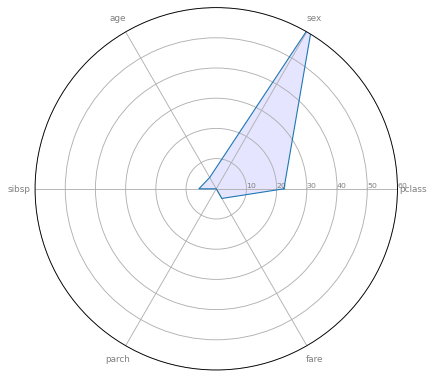

In [98]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

plt.figure(figsize=(8,6),dpi=80)

# Set data
dcf = pd.DataFrame({
'group': ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
'pclass': 0.22410763*100,
'sex': 0.63816695*100,
'age': 0.04334149*100,
'sibsp': 0.05743496*100,
'parch': 0*100,
'fare': 0.03694896*100
})
 
# number of variable
categories=list(dcf)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=dcf.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60], ["10","20","30","40","50","60"], color="grey", size=7)
plt.ylim(0,60)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()

In [45]:


# Create a RF model and train it! 
#
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

best_depth = 3        # we don't know what depth to use, so we guess...
best_num_trees = 42   # again, we guess
rforest_model = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF with depth={best_depth} and #trees={best_num_trees}") 

Built an RF with depth=3 and #trees=42


In [46]:
# We run our test set!
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1.]
Actual  labels  : [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0

152

In [47]:

from sklearn.model_selection import cross_val_score

best_depth = 0   
best_num_trees = 0
best_acc= 0


for ntrees in range(50,300,50):
    
    for d in range(1,6):
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, 
                                                        n_estimators=ntrees)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        # print(cv_scores)  # if we want to see the five individual scores 
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if average_cv_accuracy>best_acc:
            best_acc=average_cv_accuracy
            best_depth= d
            best_num_trees= ntrees
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")




# assign best values

print()
print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices.")  

depth:  1 ntrees:  50 cv accuracy:  0.7671
depth:  2 ntrees:  50 cv accuracy:  0.7870
depth:  3 ntrees:  50 cv accuracy:  0.8007
depth:  4 ntrees:  50 cv accuracy:  0.8106
depth:  5 ntrees:  50 cv accuracy:  0.8156
depth:  1 ntrees: 100 cv accuracy:  0.7746
depth:  2 ntrees: 100 cv accuracy:  0.7820
depth:  3 ntrees: 100 cv accuracy:  0.8069
depth:  4 ntrees: 100 cv accuracy:  0.8119
depth:  5 ntrees: 100 cv accuracy:  0.8131
depth:  1 ntrees: 150 cv accuracy:  0.7758
depth:  2 ntrees: 150 cv accuracy:  0.7870
depth:  3 ntrees: 150 cv accuracy:  0.8069
depth:  4 ntrees: 150 cv accuracy:  0.8082
depth:  5 ntrees: 150 cv accuracy:  0.8107
depth:  1 ntrees: 200 cv accuracy:  0.7770
depth:  2 ntrees: 200 cv accuracy:  0.7845
depth:  3 ntrees: 200 cv accuracy:  0.8032
depth:  4 ntrees: 200 cv accuracy:  0.8057
depth:  5 ntrees: 200 cv accuracy:  0.8107
depth:  1 ntrees: 250 cv accuracy:  0.7833
depth:  2 ntrees: 250 cv accuracy:  0.7845
depth:  3 ntrees: 250 cv accuracy:  0.8119
depth:  4 n

In [48]:
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_tuned.fit(X_train, y_train)                              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [49]:
predicted_labels = rforest_model_tuned.predict(X_test)
actual_labels = y_test

# Let's print them so we can compare...
print("Predicted labels:", predicted_labels)
print("Actual  labels  :", actual_labels)

# And, some overall results
num_correct = sum(predicted_labels == actual_labels)
total = len(actual_labels)
print(f"\nResults on test set:  {num_correct} correct out of {total} total.")

# and, let's print our table, too...
compare_labels(predicted_labels,actual_labels)

Predicted labels: [0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1.]
Actual  labels  : [0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0

156

In [50]:
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests

# we should have best_depth and best_num_trees
rforest_model_final = ensemble.RandomForestClassifier(max_depth=best_depth, 
                                                      n_estimators=best_num_trees)

# we train the model (it's one line!)
rforest_model_final.fit(X_all, y_all)              # yay!  trained!
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}") 

Built an RF classifier with depth=5 and ntrees=50


In [51]:
def predictive_model( Features ):

    
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_survived = rforest_model_final.predict(our_features)
    
    predicted_survived = int(round(predicted_survived[0]))  # unpack one element

    return f" Features's {Features} passange is ({predicted_survived})"

In [81]:
print(rforest_model_final.feature_importances_)
print()

# let's see them with each feature name:
IMPs = rforest_model_final.feature_importances_

# enumerate is great when you want indices _and_ elements!
for i, importance in enumerate(IMPs):
    perc = importance*100
    print(f"Feature {COLUMNS[i]:>12s} has {perc:>7.2f}% of the decision-making importance.")


[0.14995521 0.50503521 0.11010168 0.04327846 0.04150611 0.15012333]

Feature       pclass has   15.00% of the decision-making importance.
Feature          sex has   50.50% of the decision-making importance.
Feature          age has   11.01% of the decision-making importance.
Feature        sibsp has    4.33% of the decision-making importance.
Feature        parch has    4.15% of the decision-making importance.
Feature         fare has   15.01% of the decision-making importance.


In [78]:
cf = pd.DataFrame(
data= IMPs
).T
cf.columns=COLUMNS[:-1]


In [84]:
IMPs

array([0.14995521, 0.50503521, 0.11010168, 0.04327846, 0.04150611,
       0.15012333])

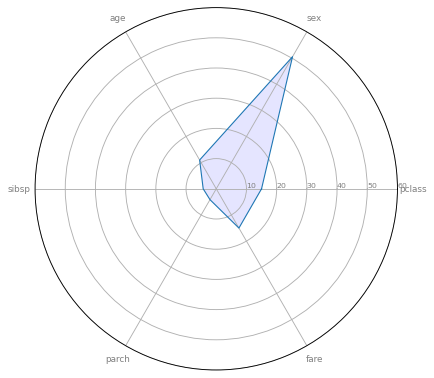

In [97]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

plt.figure(figsize=(8,6),dpi=80)

# Set data
df = pd.DataFrame({
'group': ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare'],
'pclass': 0.14995521*100,
'sex': 0.50503521*100,
'age': 0.11010168*100,
'sibsp': 0.04327846*100,
'parch': 0.04150611*100,
'fare': 0.15012333*100
})
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories, color='grey', size=8)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30,40,50,60], ["10","20","30","40","50","60"], color="grey", size=7)
plt.ylim(0,60)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
 
# Fill area
ax.fill(angles, values, 'b', alpha=0.1)

# Show the graph
plt.show()